# Importing the Required Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import nltk
import warnings
warnings.filterwarnings('ignore')

# Data Collection And Pre-processing

In [4]:
# Collecting data from excel file.
df = pd.read_excel(r"C:\Users\91749\Downloads\email.xlsx")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
# Checking the shape of dataset.
df.shape

(5572, 5)

In [6]:
# Checking the random sample from the dataset.
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1042,ham,Easy ah?sen got selected means its good..,NaN,NaN,NaN
1638,ham,Great comedy..cant stop laughing da:),NaN,NaN,NaN
4655,ham,"K, I'll work something out",NaN,NaN,NaN
4612,ham,How much you got for cleaning,NaN,NaN,NaN
2830,ham,Thanx 4 sending me home...,NaN,NaN,NaN


# 1. Data Cleaning

In [7]:
# Checking the dataset info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# Dropping the irrelevent columns from the dataset.
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [9]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
# Renaming some columns.
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)
df.sample(5)

,Target,Text
3614,ham,I enjoy watching and playing football and bask...
1561,ham,Dnt worry...use ice pieces in a cloth pack.als...
5248,ham,U come n search tat vid..not finishd..
2851,ham,how tall are you princess?
1482,ham,Ok...


In [11]:
# Checking the unique values in the dataset.
df['Target'].unique()

array(['ham', 'spam'], dtype=object)

In [12]:
# Label Encoding.
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [13]:
df['Target']= label.fit_transform(df['Target'])

In [14]:
df

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [15]:
# Checking the Missing value.
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [16]:
# Check for duplicate values
df.duplicated().sum()

403

In [17]:
# Removing the duplicated values
df = df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()

0

In [19]:
df.shape

(5169, 2)

#  Exploratory Data Analysis

In [20]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

([<matplotlib.patches.Wedge at 0x1a6a25f8b50>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

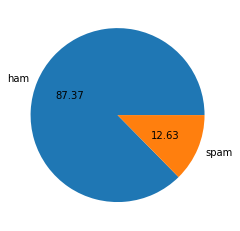

In [22]:
plt.pie(df['Target'].value_counts(), labels=['ham','spam'],autopct='%0.02f')

Here we can see that the dataset is imbalanced.

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Expert\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
df['num_char'] = df['Text'].apply(len)

In [26]:
df.head()

,Target,Text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
# Number of words in the text
df['num_words']=df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [28]:
df.head()

,Target,Text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
df['num_sentences']=df['Text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,Target,Text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df[['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [32]:
# Spam insights
df[df['Target']==1][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [33]:
# Ham Insights
df[df['Target']==0][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


<AxesSubplot:xlabel='num_char', ylabel='Count'>

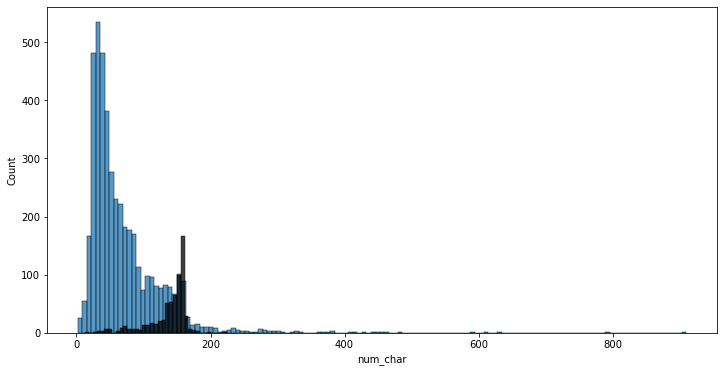

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_char'])
sns.histplot(df[df['Target']==1]['num_char'],color='black')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

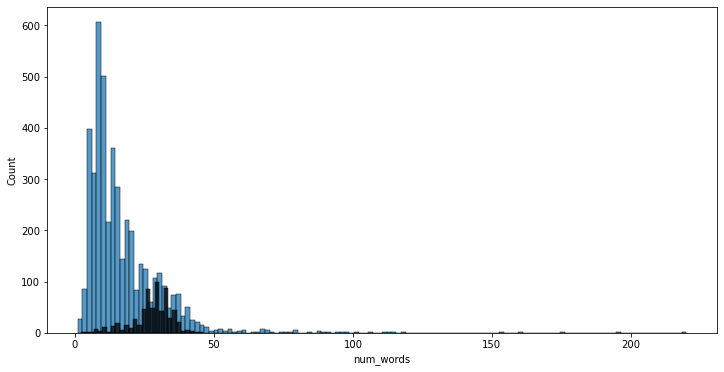

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_words'])
sns.histplot(df[df['Target']==1]['num_words'],color='black')

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

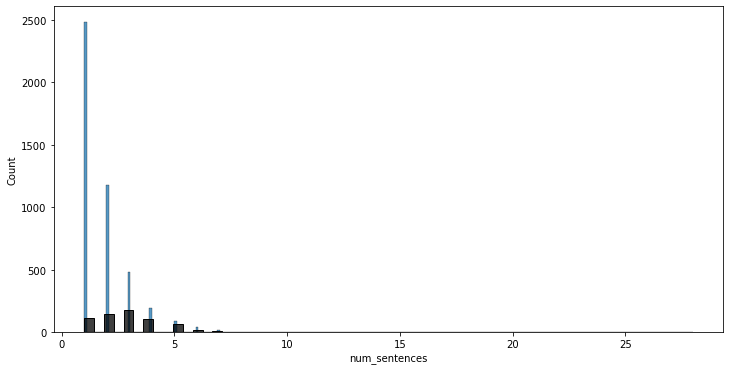

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_sentences'])
sns.histplot(df[df['Target']==1]['num_sentences'],color='black')

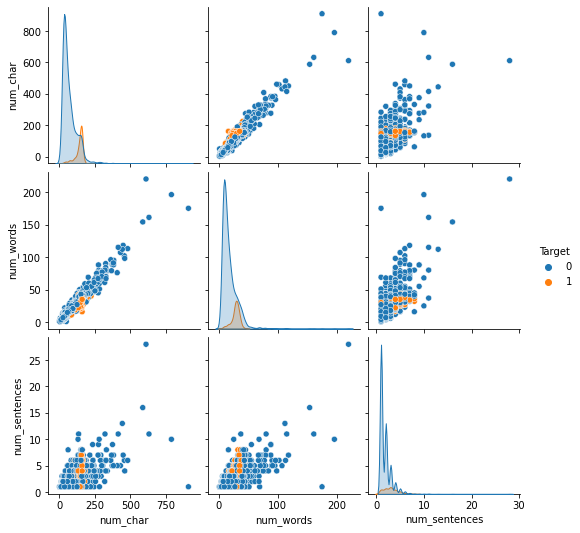

In [37]:
sns.pairplot(df,hue='Target')

<AxesSubplot:>

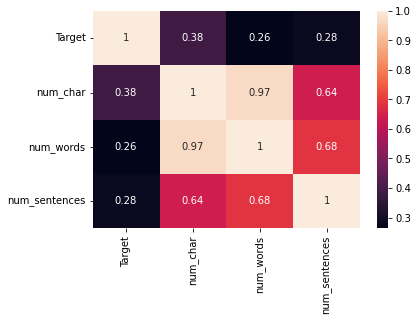

In [38]:
sns.heatmap(df.corr(),annot=True)


# Data Preprocessing

- Lower case
- Tokenization
- Removeing Sepcial charectors
- Removing Stopwords and punctuations
- Stemming

In [39]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Expert\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [41]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [42]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [43]:
def tran_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    s = []
    for i in text:
        if i.isalnum():
            s.append(i)
    
    text = s[:]
    s.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            s.append(i)
            
    text = s[:]
    s.clear()
    
    for i in text:
        s.append(ps.stem(i))
    
    return ' '.join(s)

In [44]:
tran_text('o suppress any warnings in the script, import the warnings library, and pass the')

'suppress warn script import warn librari pass'

In [45]:
df['Text'][5]

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"

In [112]:
tran_text(df['Text'][2])

'free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18'

In [47]:
# Transformation of the text

df['Text_transformed'] = df['Text'].apply(tran_text)

In [48]:
df.head()

,Target,Text,num_char,num_words,num_sentences,Text_transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [49]:
spam_corp = []

for msg in df[df['Target']==1]['Text_transformed'].tolist():
    for word in msg.split():
        spam_corp.append(word)
        

In [50]:
len(spam_corp)

9939

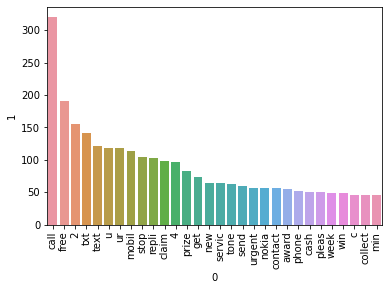

In [51]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corp).most_common(30))[0], pd.DataFrame(Counter(spam_corp).most_common(30))[1])
plt.xticks(rotation=90)
plt.show()

In [52]:
ham_corp = []

for msg in df[df['Target']==0]['Text_transformed'].tolist():
    for word in msg.split():
        ham_corp.append(word)

In [53]:
len(ham_corp)

35394

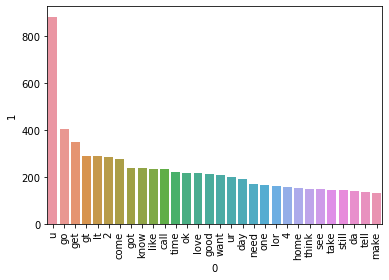

In [54]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corp).most_common(30))[0], pd.DataFrame(Counter(ham_corp).most_common(30))[1])
plt.xticks(rotation=90)
plt.show()

In [55]:
# Text Vectorization 
df.head()

,Target,Text,num_char,num_words,num_sentences,Text_transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# 4. Model Building

In [56]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [57]:
cv  =CountVectorizer()

In [58]:
tfidf = TfidfVectorizer(max_features=3000)

In [59]:
X = tfidf.fit_transform(df['Text_transformed']).toarray()

In [60]:
X.shape

(5169, 3000)

In [61]:
y = df['Target'].values

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [64]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [65]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [66]:
gnb= GaussianNB()
mnb = MultinomialNB()
bnv = BernoulliNB()

In [67]:
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8694390715667312
0.5068493150684932
[[788 108]
 [ 27 111]]


In [110]:
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

0.9709864603481625
1.0
[[896   0]
 [ 30 108]]


In [69]:
bnv.fit(X_test,y_test)
y_pred2 = bnv.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

0.9458413926499033
1.0
[[896   0]
 [ 56  82]]


In [70]:
## MNB with TFIDF is performing well

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier

In [74]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
# xgb = XGBClassifier(n_estimators=50,random_state=2)

In [75]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
#     'xgb':xgb
}

In [76]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [77]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8282828282828283
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.8671875
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.92


In [78]:
clf_performance_df =  pd.DataFrame({'Algorithm': clfs.keys(),'Accuracy_score':accuracy_scores,'Precision_Score':precision_scores}).sort_values('Precision_Score',ascending=False)

In [79]:
clf_performance_df

,Algorithm,Accuracy_score,Precision_Score
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
9,GBDT,0.947776,0.920000
7,BgC,0.957447,0.867188
3,DT,0.929400,0.828283


In [80]:
clf_performance_df1 = pd.melt(clf_performance_df, id_vars = 'Algorithm')

In [81]:
clf_performance_df1

,Algorithm,variable,value
0,KN,Accuracy_score,0.905222
1,NB,Accuracy_score,0.970986
2,RF,Accuracy_score,0.974855
3,SVC,Accuracy_score,0.975822
4,ETC,Accuracy_score,0.974855
5,LR,Accuracy_score,0.958414
6,AdaBoost,Accuracy_score,0.960348
7,GBDT,Accuracy_score,0.947776
8,BgC,Accuracy_score,0.957447
9,DT,Accuracy_score,0.929400


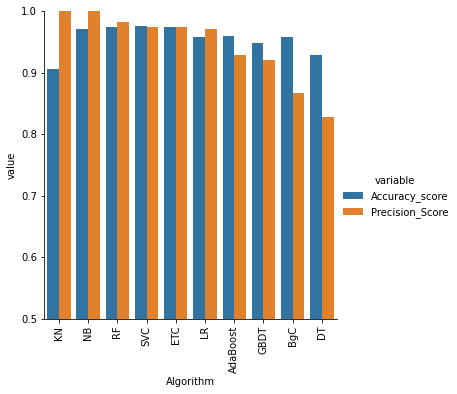

In [82]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=clf_performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation=90)
plt.show()

In [83]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [84]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [85]:
temp_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
9,GBDT,0.947776,0.920000
7,BgC,0.957447,0.867188
3,DT,0.929400,0.828283


In [88]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [89]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [90]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')


In [91]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [92]:
new_df_scaled.merge(temp_df,on='Algorithm')


,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,GBDT,0.947776,0.920000,0.947776,0.920000,0.947776,0.920000,0.947776,0.920000
8,BgC,0.957447,0.867188,0.957447,0.867188,0.957447,0.867188,0.957447,0.867188
9,DT,0.929400,0.828283,0.929400,0.828283,0.929400,0.828283,0.929400,0.828283


In [93]:
# voting classifier
svc = SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
from sklearn.ensemble import VotingClassifier

In [94]:
voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('etc',etc)],voting='soft')

In [95]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [96]:
y_pred_vote = voting.predict(X_test)
print('Accuracy', accuracy_score(y_test,y_pred_vote))
print('Precision',precision_score(y_test,y_pred_vote))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


## Applying Stacking

In [97]:
estimators = [('SVM',svc),('Navie Bays',mnb),('ET',etc)]
final_estimator = RandomForestClassifier()

In [98]:
from sklearn.ensemble import StackingClassifier

In [99]:
clfss = StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [100]:
clfss.fit(X_train,y_train)
y_pred_stack = clfss.predict(X_test)
print('Accuracy', accuracy_score(y_test,y_pred_stack))
print('Precision',precision_score(y_test,y_pred_stack))

Accuracy 0.9787234042553191
Precision 0.9393939393939394


In [111]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))